In [31]:
import pandas as pd
import matplotlib.pyplot as plt

netflix_df=pd.read_csv('netflix_data.csv')


In [2]:
### What was the most frequent movie duration in the 1990s? Save an approximate answer as an integer called `duration.`

movie_duration_1990s=netflix_df[(netflix_df['release_year']>=1990)&
                                (netflix_df['release_year']<2000)&
                                (netflix_df['type']=='Movie')]
duration=movie_duration_1990s['duration'].mode()[0]
print(duration)


94


In [3]:
### A movie is considered short if it is less than 90 minutes. 
### Count the number of short action movies released in the 1990s and save this integer as `short_movie_count`.

short_movies_1990s=netflix_df[(netflix_df['release_year']>=1990)&
                              (netflix_df['release_year']<2000)&
                              (netflix_df['type']=='Movie')&
                              (netflix_df['duration']<90)&
                              (netflix_df['genre']=='Action')]
short_movies_count=len(short_movies_1990s)
for index,movies in short_movies_1990s.iterrows():
    print(movies['title'])
    
print(short_movies_count)
    

EVANGELION: DEATH (TRUE)²
Hero
Look Out, Officer
Passenger 57
Rumble in the Bronx
The Bare-Footed Kid
The End of Evangelion
7


In [4]:
### The number of drama movies released in the 2000s with a duration of more than 120 minutes.

movies_2000s=netflix_df[(netflix_df['release_year']==2000)&
                        (netflix_df['type']=='Movie')&
                        (netflix_df['duration']>120)
                       ]
movies_2000s_count=len(movies_2000s)
print(movies_2000s_count)
movies_2000s

9


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
831,s1263,Movie,Chal Mere Bhai,David Dhawan,"Sanjay Dutt, Salman Khan, Karisma Kapoor, Dali...",India,"December 31, 2019",2000,132,"When a secretary saves her tycoon boss's life,...",Comedies
1385,s2201,Movie,Fiza,Khalid Mohamed,"Karisma Kapoor, Jaya Bhaduri, Hrithik Roshan, ...",India,"August 2, 2018",2000,163,Fiza's brother disappears during Mumbai's horr...,Dramas
1623,s2589,Movie,Hamara Dil Aapke Paas Hai,Satish Kaushik,"Anil Kapoor, Aishwarya Rai Bachchan, Sonali Be...",India,"March 1, 2018",2000,158,Love blooms when kind-hearted Avinash takes in...,Dramas
2204,s3478,Movie,Kya Kehna,Kundan Shah,"Preity Zinta, Saif Ali Khan, Anupam Kher, Fari...",India,"April 1, 2018",2000,149,A young university student's world is shaken a...,Dramas
2977,s4758,Movie,Papa the Great,Bhagyaraj,"Krishan Kumar, Nagma, Satya Prakash, Master Bo...",India,"December 8, 2017",2000,137,"After witnessing a murder, a meek family man m...",Comedies
3033,s4846,Movie,Phir Bhi Dil Hai Hindustani,Aziz Mirza,"Shah Rukh Khan, Juhi Chawla, Paresh Rawal, Sat...",India,"April 1, 2018",2000,159,"In this Bollywood entertainment, two journalis...",Comedies
3109,s5001,Movie,Pukar,Rajkumar Santoshi,"Anil Kapoor, Madhuri Dixit, Namrata Shirodkar,...",India,"March 1, 2018",2000,165,A notorious terrorist manipulates an Indian ar...,Action
3583,s5733,Movie,Space Cowboys,Clint Eastwood,"Clint Eastwood, Tommy Lee Jones, Donald Suther...",United States,"August 1, 2019",2000,130,A retired engineer agrees to help NASA prevent...,Action
4683,s7559,Movie,What Lies Beneath,Robert Zemeckis,"Harrison Ford, Michelle Pfeiffer, Diana Scarwi...",United States,"January 1, 2020",2000,130,When Claire Spencer starts hearing ghostly voi...,Horror Movies


<Figure size 640x480 with 0 Axes>

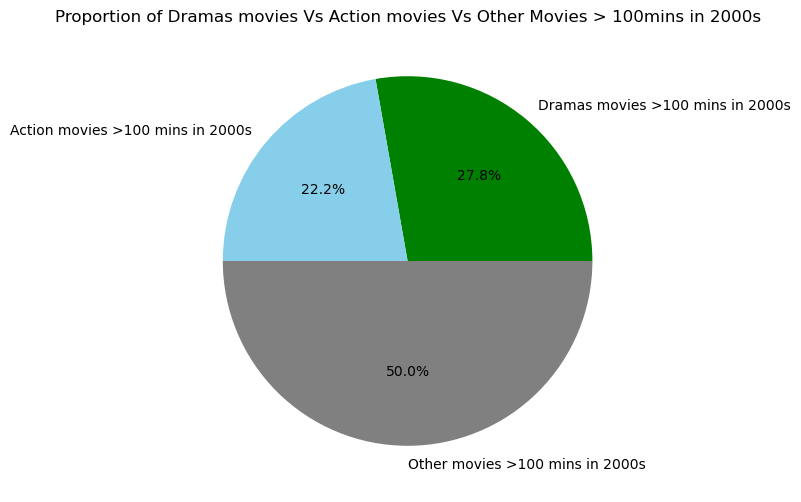

In [22]:


dramas_count=len(netflix_df[(netflix_df['release_year']==2000)&
                         (netflix_df['duration']>100)&
                         (netflix_df['genre']=='Dramas')])

action_count=len(netflix_df[(netflix_df['release_year']==2000)&
                         (netflix_df['duration']>100)&
                         (netflix_df['genre']=='Action')])


data={
    'Dramas movies >100 mins in 2000s':dramas_count,
    'Action movies >100 mins in 2000s':action_count
}
#other=netflix_df[(netflix_df['release_year'] == 2000) & 
#                                      (netflix_df['duration'] > 100) & 
#                                      (~netflix_df['genre'].str.contains('Action|Dramas', na=False))]

other_category_count = len(netflix_df[(netflix_df['release_year'] == 2000) & 
                                      (netflix_df['duration'] > 100) & 
                                      (~netflix_df['genre'].str.contains('Action|Dramas', na=False))])
data['Other movies >100 mins in 2000s']=other_category_count

plt.clf()
plt.figure(figsize=(8,6))
plt.pie(data.values(),labels=data.keys(),autopct='%1.1f%%',colors=['green','skyblue','gray'])
plt.title('Proportion of Dramas movies Vs Action movies Vs Other Movies > 100mins in 2000s')
plt.show()

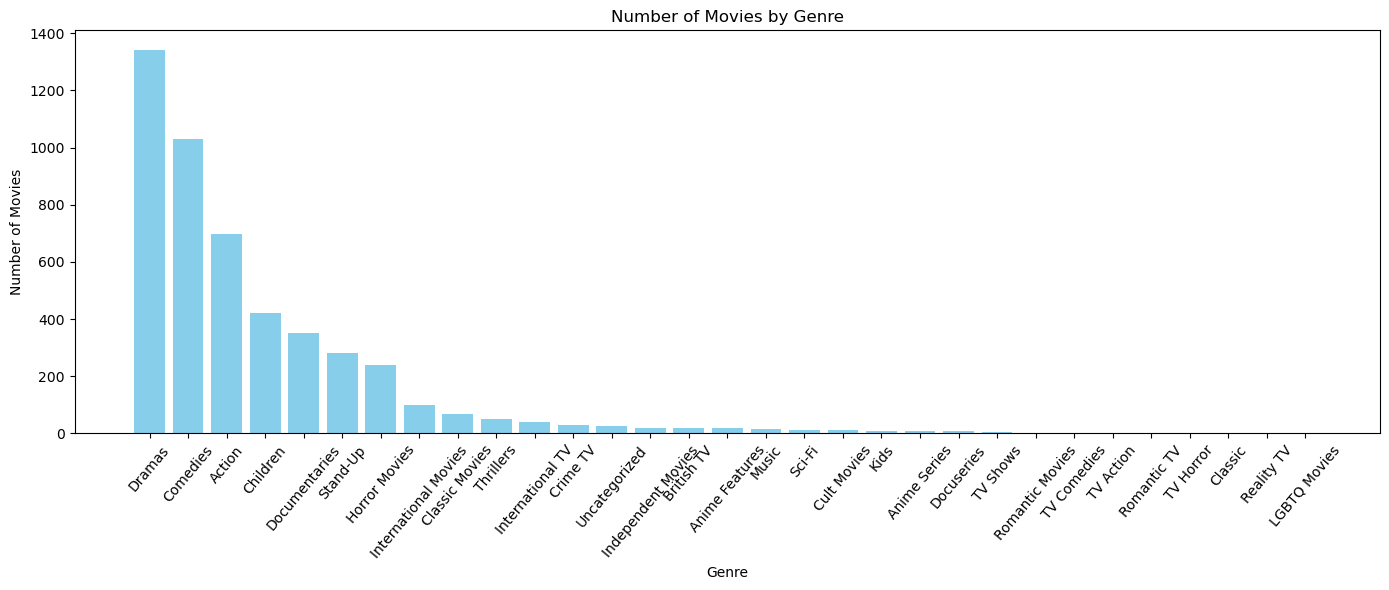

In [23]:
genre_counts = netflix_df['genre'].value_counts()

# Plot bar chart
plt.figure(figsize=(14, 6))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

In [35]:
netflix_df['date_added']=pd.to_datetime(netflix_df['date_added'], errors='coerce')

filtered_movies=netflix_df[
                           netflix_df['director']=='Robert Zemeckis'
    ] 

#get title
titles=filtered_movies['title'].tolist()
print(titles)
filtered_movies

['The Polar Express', 'What Lies Beneath']


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
4213,s6770,Movie,The Polar Express,Robert Zemeckis,"Tom Hanks, Leslie Zemeckis, Eddie Deezen, Nona...",United States,2021-01-01,2004,100,"In this warm-hearted tale, a young boy's faith...",Children
4683,s7559,Movie,What Lies Beneath,Robert Zemeckis,"Harrison Ford, Michelle Pfeiffer, Diana Scarwi...",United States,2020-01-01,2000,130,When Claire Spencer starts hearing ghostly voi...,Horror Movies


In [36]:
movies_added_2015=netflix_df[(netflix_df['date_added'].dt.year==2015)&
                             (netflix_df['type']=='Movie')]
                    
top5_movies_titles_added_2015=movies_added_2015[['title']].head(5)
top5_movies_titles_added_2015

,title
91,6 Years
173,A Very Murray Christmas
227,Advantageous
373,Anjelah Johnson: Not Fancy
382,Anthony Jeselnik: Thoughts and Prayers


<Figure size 640x480 with 0 Axes>

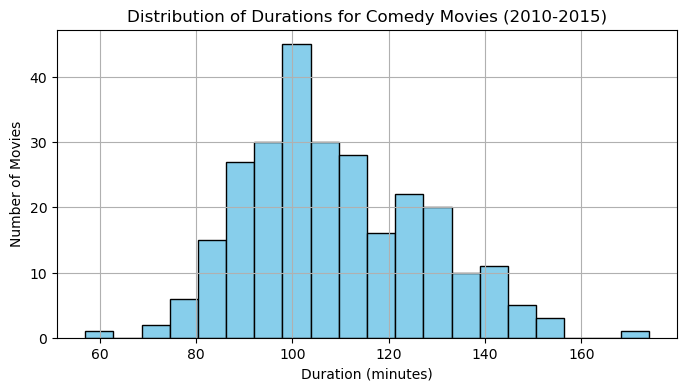

108.98897058823529

In [39]:
comedy_movies_2010_to_2015=netflix_df[(netflix_df['release_year']>=2010)&
                               (netflix_df['release_year']<=2015)&
                               (netflix_df['genre']=='Comedies')]
average_durations=comedy_movies_2010_to_2015['duration'].mean()

plt.clf()
plt.figure(figsize=(8, 4))
plt.hist(comedy_movies_2010_to_2015['duration'], bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Durations for Comedy Movies (2010-2015)')
plt.grid(True)
plt.show()
average_durations

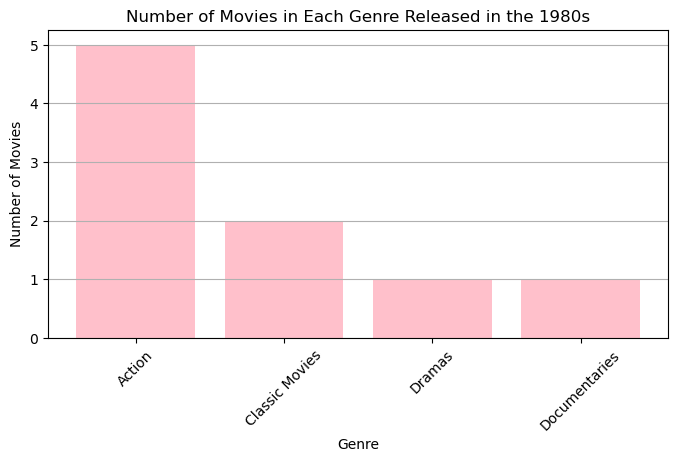

genre
Action            5
Classic Movies    2
Dramas            1
Documentaries     1
Name: count, dtype: int64


In [37]:
movies_released_1980=netflix_df[netflix_df['release_year']==1980]
genre_count_1980=movies_released_1980['genre'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(genre_count_1980.index,genre_count_1980.values,color='pink')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Genre Released in the 1980s')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
print(genre_count_1980)